In [2]:
from netatmo_temperature import *

In [71]:
# read data
df = pd.read_csv('export/compans_temp.csv')[['date', 'temperature']]
df.rename(columns={'date':'datetime'}, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])
# Floor to the hour (19:30 --> 19:00)
df['datetime'] = df['datetime'].dt.floor('H') 

In [72]:
# read exterior temp
temp_paris = pd.read_csv('export/temp_all_paris.csv')[['datetime', 'temp']]
temp_paris['datetime'] = pd.to_datetime(temp_paris['datetime'])
temp_paris.rename(columns={'temp':'temp_exterior'}, inplace=True)

In [86]:
data = pd.merge(df, temp_paris, how='left')

In [89]:
data_stack = data.set_index('datetime')\
    .stack().reset_index()\
    .rename(columns={'level_1':'variable',
                     0:'value'})

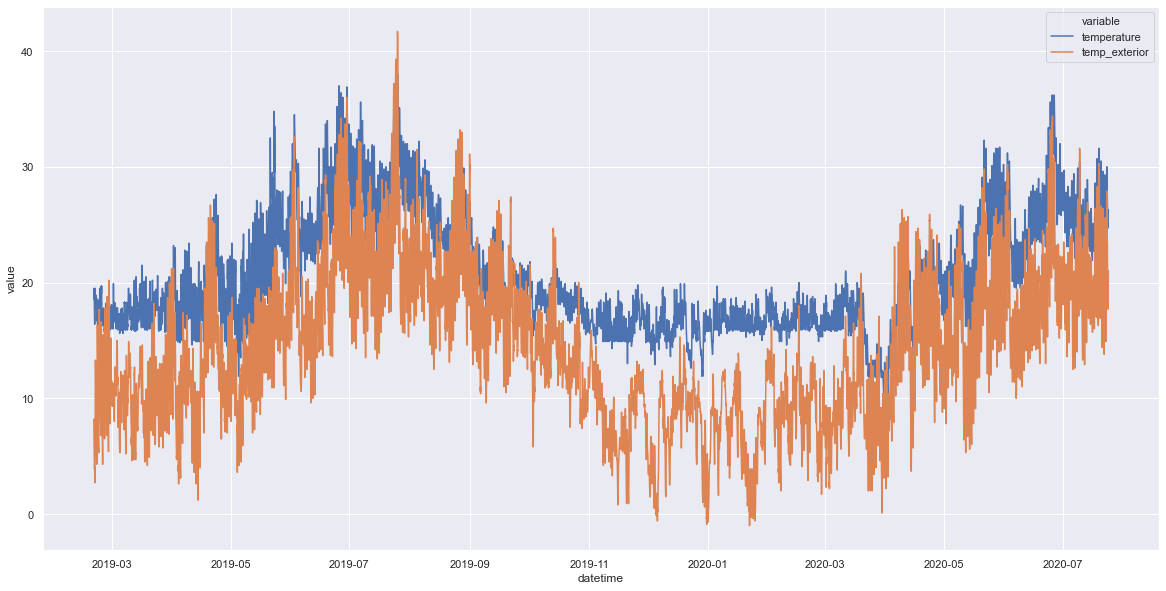

In [92]:
# plot temperature graph

sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(x="datetime", y='value', hue='variable', data=data_stack)

In [93]:
data.keys()

Index(['datetime', 'temperature', 'temp_exterior'], dtype='object')

In [94]:
data['diff'] = data['temperature'] - data['temp_exterior']

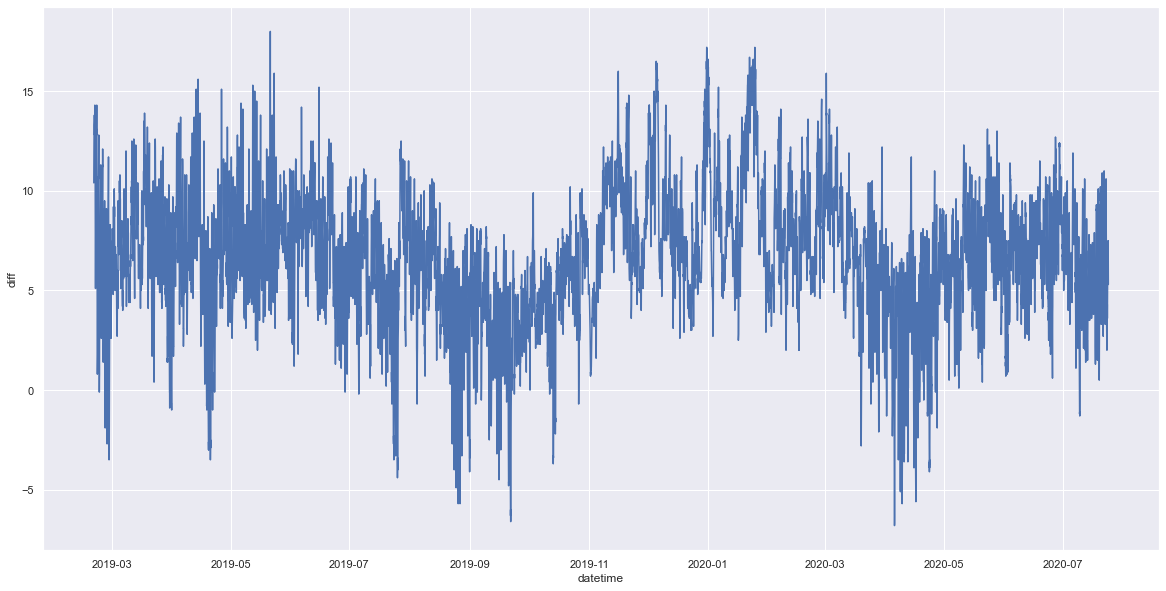

In [99]:
# plot diff

sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(x="datetime", y='diff', data=data)

,datetime,temperature,temp_exterior,diff
0,2019-02-19 19:00:00,18.6,8.2,10.4
1,2019-02-19 20:00:00,18.7,7.8,10.9
2,2019-02-19 21:00:00,19.0,7.0,12.0
3,2019-02-19 22:00:00,19.5,6.7,12.8
4,2019-02-19 23:00:00,19.2,5.9,13.3
...,...,...,...,...
12492,2020-07-24 07:00:00,24.8,17.7,7.1
12493,2020-07-24 08:00:00,25.2,17.7,7.5
12494,2020-07-24 09:00:00,25.8,18.5,7.3
12495,2020-07-24 10:00:00,26.2,19.7,6.5
